# Impact of Math, Tutoring, and Math Blast Workshops On Math Test and GPA Outcomes

**Research Question:** What, if any impact does the role math, tutoring, or math blast have on a student's GPA or math test scores? 


**Methodology** Students' attendance, test, and GPA data were collected from Fall 2016 through Fall 2019. Workshops were categorized as either "Math", "Math Blast" "Tutoring", or "Other Workshops" using the data available to make that determination.$^{1}$ Both the number of sessions and time spent in sessions were used for evaluation purposes.

Students were then evaluated in four key ways: 
1. Does the time or number of sessions in the identified workshops over a student's CT career impact students' 11th Grade cumulative GPA, or highest math test score? - 738 Students examined.

2. Does the time or number of sessions in the identified workshops over a student's CT career impact students' GPA growth (from their first GPA to their 11th Grade CGPA) or their math test score growth (from their first math test score to their highest)? - 723 students examined.

3. Does the time or number of sessions in the identified workshops during a particular grade impact students' cumulative GPA or test scores during the following grade? - The results from this evaluation are not displayed below due to the results being very similar to the above research. - 157 students examined.

4. Are there any trends in how students respond to survey questions regarding math interventions or tutoring using data from the FY18, FY19, and FY20 high school student survey?

For the first and second method, students were also grouped based on their incoming GPA or incoming math scores, to see if these workshops had a greater impact on students with below a 2.75 incoming GPA or below a 16 incoming math test score. 

For each method, an OLS regression was used to determine the statistical significance of students' attendance. For each regression, all workshop types (of the same unit type - i.e. sessions or duration$^{2}$) were included in the model (as distinct variables).

**Results:** Overall, there is little evidence any workshop has a strong positive impact on any of the three tested outcomes. Most models returned results that were either statistically insignificant or more likely, statistically significant but with a coefficient of essentially 0. Even models that yielded positive coefficients indicate for a student to increase their ACT math score by one point, it would require them to attend 50 additional workshop sessions. 

This generally held true for all workshop types. 

Finally, looking at the survey results there has been a decline in students' self-reported understanding of math concepts since FY18, although there has been an increase in students responding positively to questions related to tutoring.$^{3}$ 



**Assumptions and Data Manipulation:**
Due to limitations in some data availability, and consistency some assumptions and data manipulations had to be made. Two key manipulations stand out.
1. Some sites predominantly use SAT scores instead of the more common ACT scores for testing students. For these sites, SAT scores were converted into an equivalent ACT score using the official College Board guidelines. Note, this is why students were only evaluated on math test scores, and not English or cumulative test scores. Because the SAT combines reading and English scores, whereas the ACT does not - and not all our students have both ACT English and reading, it made comparing these scores more challenging. 

2. Most workshop records indicate the duration (in minutes) of a workshop session. However, this data is less consistently tracked, and often for older records, there is duration data. For these workshops, the assumption was made that the average workshop is 60 minutes. Thus any missing data were filled in based on this assumption. For most workshops, this likely is a safe assumption. However, for Math Blast workshops, they often are less frequent but longer sessions. There is a chance using this method undercounted the true duration of a Math Blast workshop. Overall, the records that were filled - especially for Math Blast - were small, so this still feels like a safe assumption. 

3. In the FY20 survey questions about tutoring were omitted, so the positive increase is only from FY18 to FY19. 
 

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as smf
import sys

sys.path.append('../')
from src.helpers import create_regression_plots_row, create_regression_grid, create_regression_plots_overall, create_overall_chart

plt.style.use('college_track')
mpl.rcParams.update({'font.size': 8})


colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]




In [4]:
# %matplotlib inline

In [5]:
ninth_grade = pd.read_pickle("../data/processed/ninth_grade.pkl")
tenth_grade = pd.read_pickle("../data/processed/tenth_grade.pkl")
eleventh_grade = pd.read_pickle("../data/processed/eleventh_grade.pkl")
overall_df_final = pd.read_pickle("../data/processed/overall.pkl")

In [9]:
overall_df_final = overall_df_final[overall_df_final.High_School_Class__c.isin([2020,2021])]

In [10]:
overall_df_valid_first_gpa = overall_df_final[overall_df_final.first_gpa_grade != "11th Grade"]

overall_df_first_gpa_low = overall_df_valid_first_gpa[(overall_df_valid_first_gpa.first_gpa <= 2.75) ]

overall_df_first_gpa_high = overall_df_valid_first_gpa[(overall_df_valid_first_gpa.first_gpa > 2.75) ]


overall_df_valid_first_math = overall_df_final[overall_df_final.first_math_grade != overall_df_final.highest_math_score_grade]

overall_df_first_math_low = overall_df_valid_first_math[(overall_df_valid_first_math.first_math_score < 16) ]

overall_df_first_math_high = overall_df_valid_first_math[(overall_df_valid_first_math.first_math_score >= 16) ]




In [11]:
overall_summary_df = overall_df_final.agg({"Attendance_Numerator_Tutoring":["mean", "max", 'std'],
                                                     "Attendance_Numerator_Math":["mean", "max", "std"],
                                                     "Attendance_Numerator_Math_Blast":["mean", "max", 'std']})

ninth_grade_summary = ninth_grade.agg({"Attendance_Numerator_9th_Grade_Tutoring":["mean", "max", 'std'],
                                                     "Attendance_Numerator_9th_Grade_Math":["mean", "max", "std"],
                                                     "Attendance_Numerator_9th_Grade_Math_Blast":["mean", "max", 'std']})

tenth_grade_summary = tenth_grade.agg({"Attendance_Numerator_10th_Grade_Tutoring":["mean", "max", 'std'],
                                                     "Attendance_Numerator_10th_Grade_Math":["mean", "max", "std"],
                                                     "Attendance_Numerator_10th_Grade_Math_Blast":["mean", "max", 'std']})

eleventh_grade_summary = eleventh_grade.agg({"Attendance_Numerator_11th_Grade_Tutoring":["mean", "max", 'std'],
                                                     "Attendance_Numerator_11th_Grade_Math":["mean", "max", "std"],
                                                     "Attendance_Numerator_11th_Grade_Math_Blast":["mean", "max", 'std']})

In [12]:
ninth_grade_summary = ninth_grade_summary.rename(columns = {"Attendance_Numerator_9th_Grade_Tutoring": "Tutoring (Sessions) - 9th Grade",
                                     "Attendance_Numerator_9th_Grade_Math": "Math (Sessions) - 9th Grade",
                                      "Attendance_Numerator_9th_Grade_Math_Blast": "Math Blast (Sessions) - 9th Grade"
                                     }).round(0)


tenth_grade_summary = tenth_grade_summary.rename(columns = {"Attendance_Numerator_10th_Grade_Tutoring": "Tutoring (Sessions) - 10th Grade",
                                     "Attendance_Numerator_10th_Grade_Math": "Math (Sessions) - 10th Grade",
                                      "Attendance_Numerator_10th_Grade_Math_Blast": "Math Blast (Sessions) - 10th Grade"
                                     }).round(0)


eleventh_grade_summary = eleventh_grade_summary.rename(columns = {"Attendance_Numerator_11th_Grade_Tutoring": "Tutoring (Sessions) - 11th Grade",
                                     "Attendance_Numerator_11th_Grade_Math": "Math (Sessions) - 11th Grade",
                                      "Attendance_Numerator_11th_Grade_Math_Blast": "Math Blast (Sessions) - 11th Grade"
                                     }).round(0)

overall_summary_df = overall_summary_df.rename(columns = {"Attendance_Numerator_Tutoring": "Tutoring (Sessions) - 9th-11th Grade",
                                     "Attendance_Numerator_Math": "Math (Sessions) - 9th-11th Grade",
                                      "Attendance_Numerator_Math_Blast": "Math Blast (Sessions) - 9th-11th Grade"
                                     }).round(0)


## Summary of Students' Attendance

Each table below list the average number of sessions students attended in the three workshop types being evaluated. In addition they display the max number of sessions a single student attended, and the standard deviation of workshops a student attended.

These tables indicate a few notable findings. 

1. Tutoring workshops vary significantly across sites. Over a three year period students attend 29 tutoring workshops on average, but the max number of workshops a single student attended is over 100, and the standard deviation is 20 workshop sessions. This means that very often students attend very few tutoring workshops, or a very large number of workshops. 

2. The 9th-11th grade chart only contains data on Class of 2020 and 2021 students, whereas the grade level charts contains data on a larger group of students. The average number of sessions attended during a particular grade level is often near the average number of sessions students attend during the CT career. This implies two possibilities (both of which likely occur). The first, is students are more likely to attend tutoring during a specific year where they likely need additional attention, and then in following years receive less service. The second, is the number of tutoring sessions students are attending has increased for younger students. 



In [13]:
overall_summary_df

Tutoring (Sessions) - 9th-11th Grade  Math (Sessions) - 9th-11th Grade  \
mean                                  29.0                              18.0   
max                                  101.0                              87.0   
std                                   20.0                              13.0   

      Math Blast (Sessions) - 9th-11th Grade  
mean                                     6.0  
max                                     23.0  
std                                      6.0

In [14]:
ninth_grade_summary

Tutoring (Sessions) - 9th Grade  Math (Sessions) - 9th Grade  \
mean                             34.0                         13.0   
max                              85.0                         38.0   
std                              17.0                          7.0   

      Math Blast (Sessions) - 9th Grade  
mean                                5.0  
max                                13.0  
std                                 4.0

In [15]:
tenth_grade_summary

Tutoring (Sessions) - 10th Grade  Math (Sessions) - 10th Grade  \
mean                              30.0                          13.0   
max                               88.0                          63.0   
std                               16.0                           9.0   

      Math Blast (Sessions) - 10th Grade  
mean                                 6.0  
max                                 23.0  
std                                  6.0

In [16]:
eleventh_grade_summary

Tutoring (Sessions) - 11th Grade  Math (Sessions) - 11th Grade  \
mean                              20.0                           8.0   
max                               69.0                          52.0   
std                               14.0                           9.0   

      Math Blast (Sessions) - 11th Grade  
mean                                 0.0  
max                                  0.0  
std                                  0.0

## Survey Results

Data from the FY18, FY19, and FY20 surveys were reviewed to understand how students responded to four questions. 

1. "I have a better understanding of the math concepts I'm currently learning in school"


2. "I am more determined to improve my math skills"


3. "How helpful is 1:1 tutoring?"


4. "How helpful is small group tutoring"

The first two questions were present in all three years of the survey, but the last two questions were only asked in FY18 and FY19. 

For the first question, around math understanding, there was a dip in students who responded favorably (Strongly Agree or Agree) in the FY20 survey (55%) compared to around 68% in FY18 and FY19. 

The second question, around math determination, the results have remained effectivly the same each survey. For both of these questions there was no notable change in responses when looking at students with below a 2.75 GPA compared to all students. 

The last two questions there was no notable change from the FY18 to FY19 survey, although both questions did see a higher percent of students with poor GPAs responding favorably to their impression of 1-on-1 tutoring and small group tutoring (roughly a 10% increase for each question). 



## Charts

These overview charts detail the impact *individual* workshop types had on students' outcomes. They are helpful to understand the potential magnitude of impact, but they should not be viewed a statistically meaningful.

### Impact on All Students (Growth and Highest Scores)

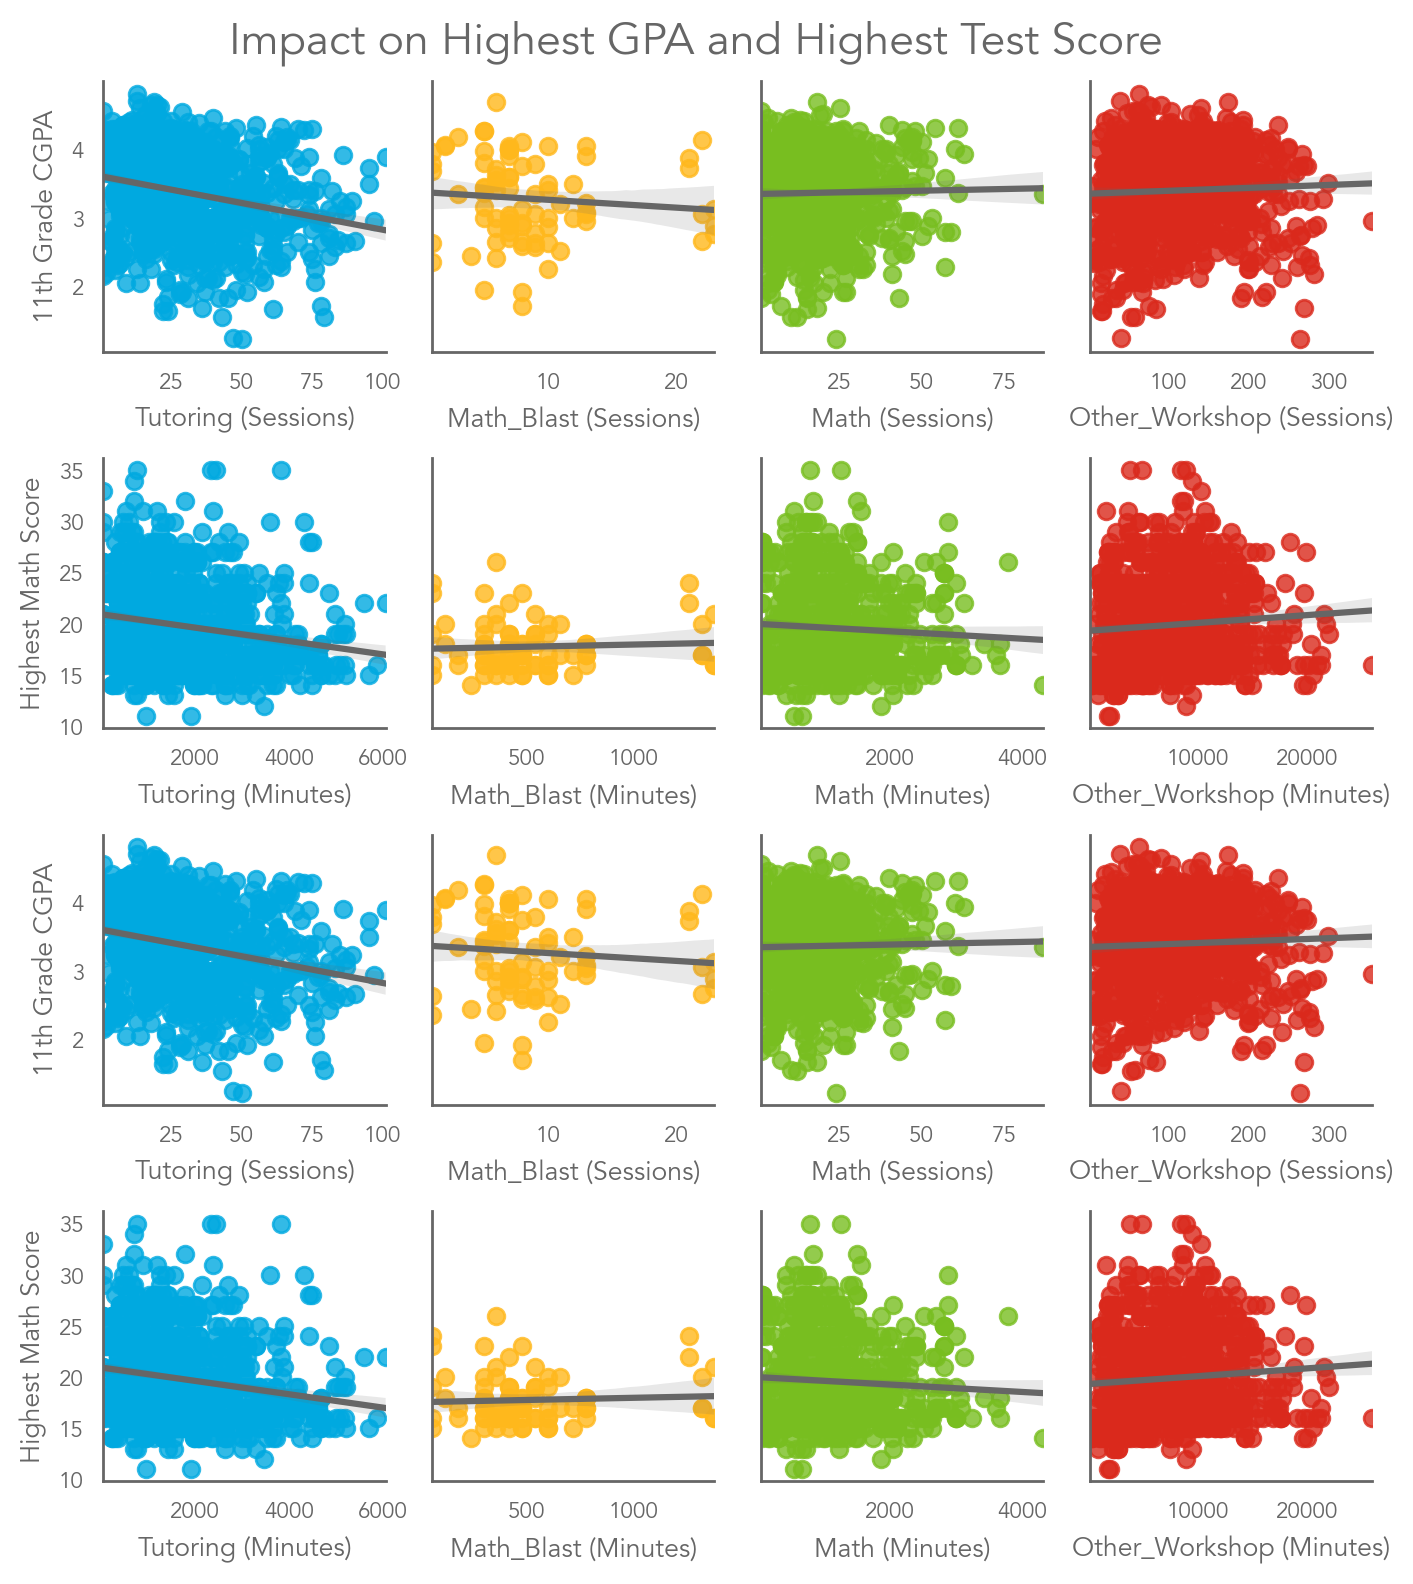

In [17]:
create_overall_chart(
    overall_df_final,
    overall_df_final,
    x_1="Attendance_Numerator",
    x_2='mod_duration_filled',
    y_1="HS_11th_Cum_GPA",
    y_2='highest_math_score',
    x_1_label="(Sessions)",
    x_2_label="(Minutes)",
    y_1_label="11th Grade CGPA", 
    y_2_label='Highest Math Score', 
    title="Impact on Highest GPA and Highest Test Score", colors=colors
)

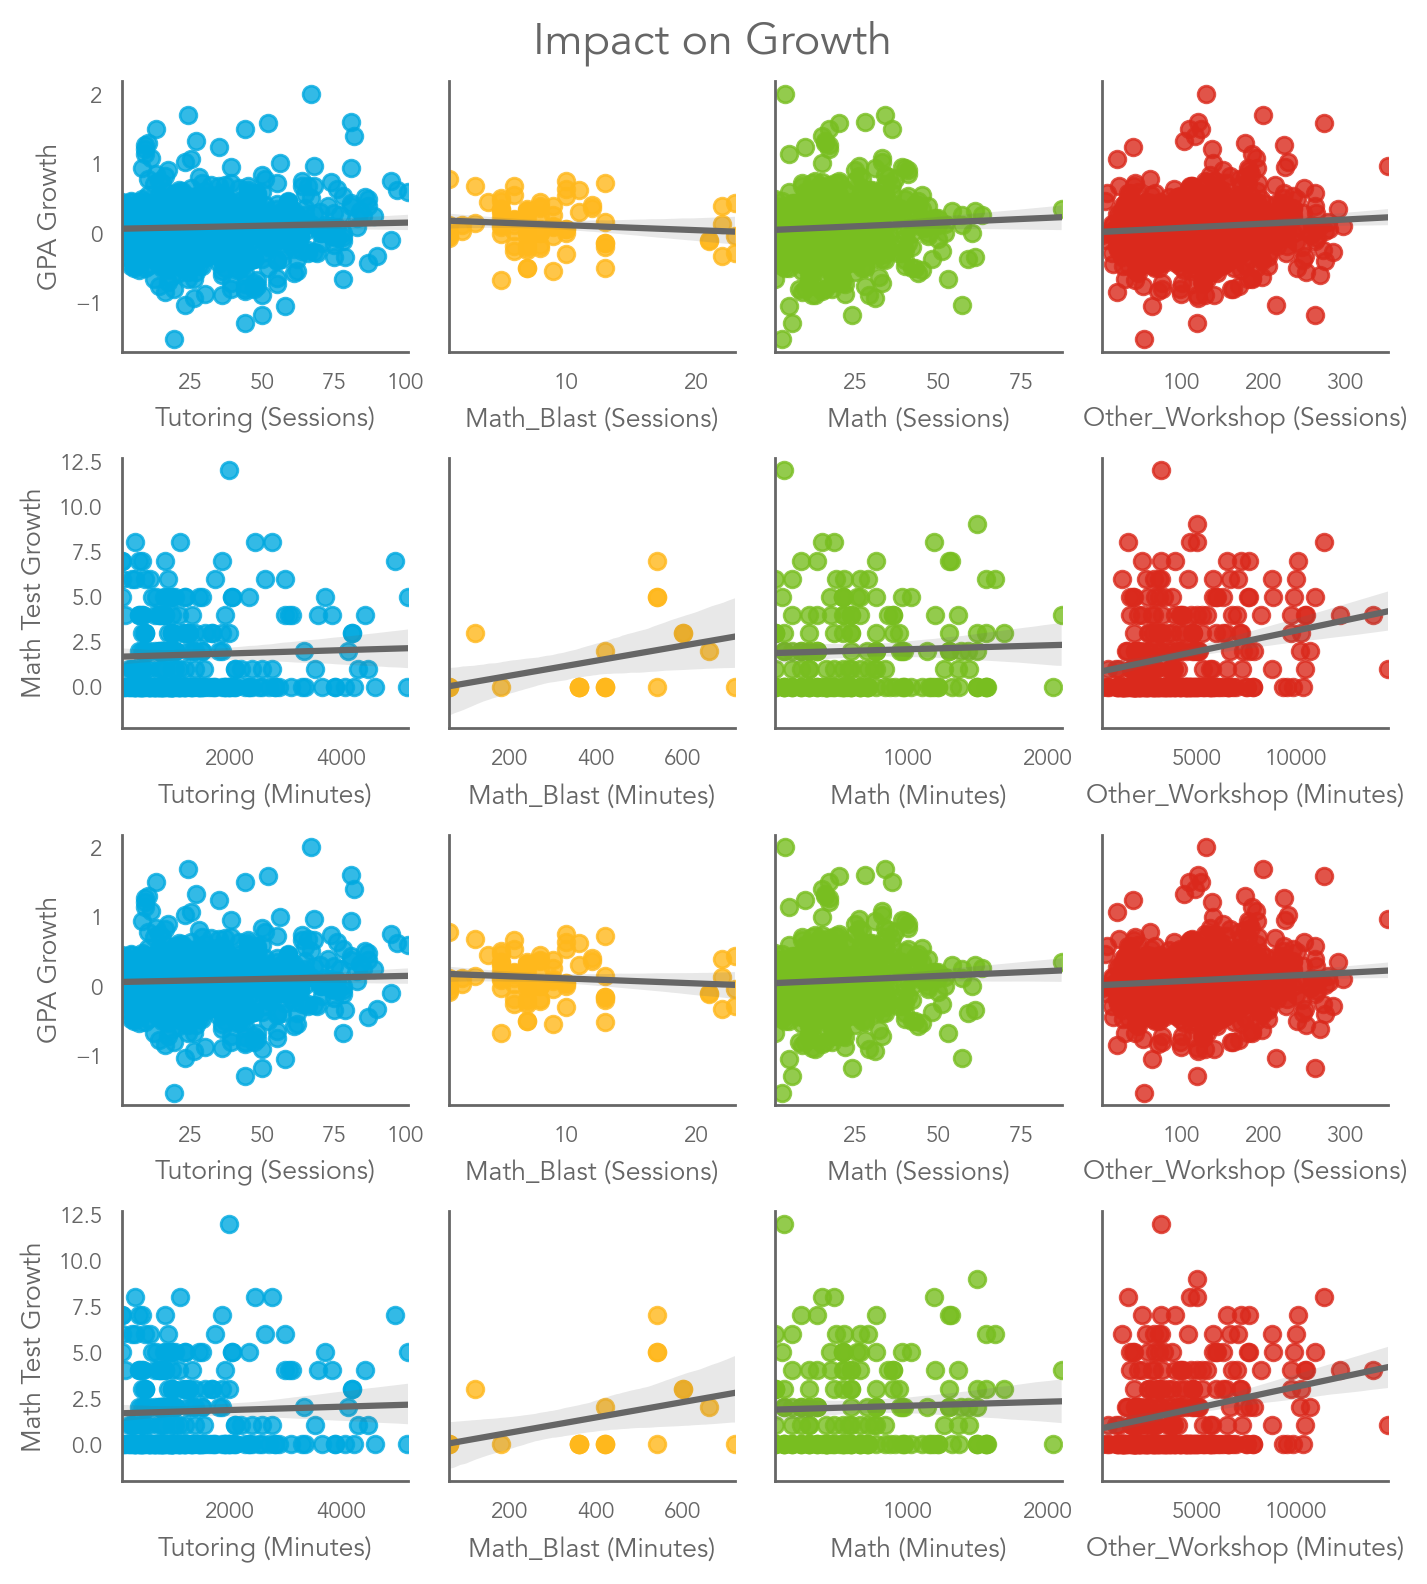

In [18]:
create_overall_chart(
    overall_df_valid_first_gpa,
    overall_df_valid_first_math,
    x_1="Attendance_Numerator",
    x_2='mod_duration_filled',
    y_1="gpa_growth",
    y_2='math_test_growth',
    x_1_label="(Sessions)",
    x_2_label="(Minutes)",
    y_1_label="GPA Growth", 
    y_2_label='Math Test Growth', 
    title="Impact on Growth", colors=colors
)

### Impact On Students Growth and Highest Scores for Students Below 2.75 GPA or 16 Math Test Scores

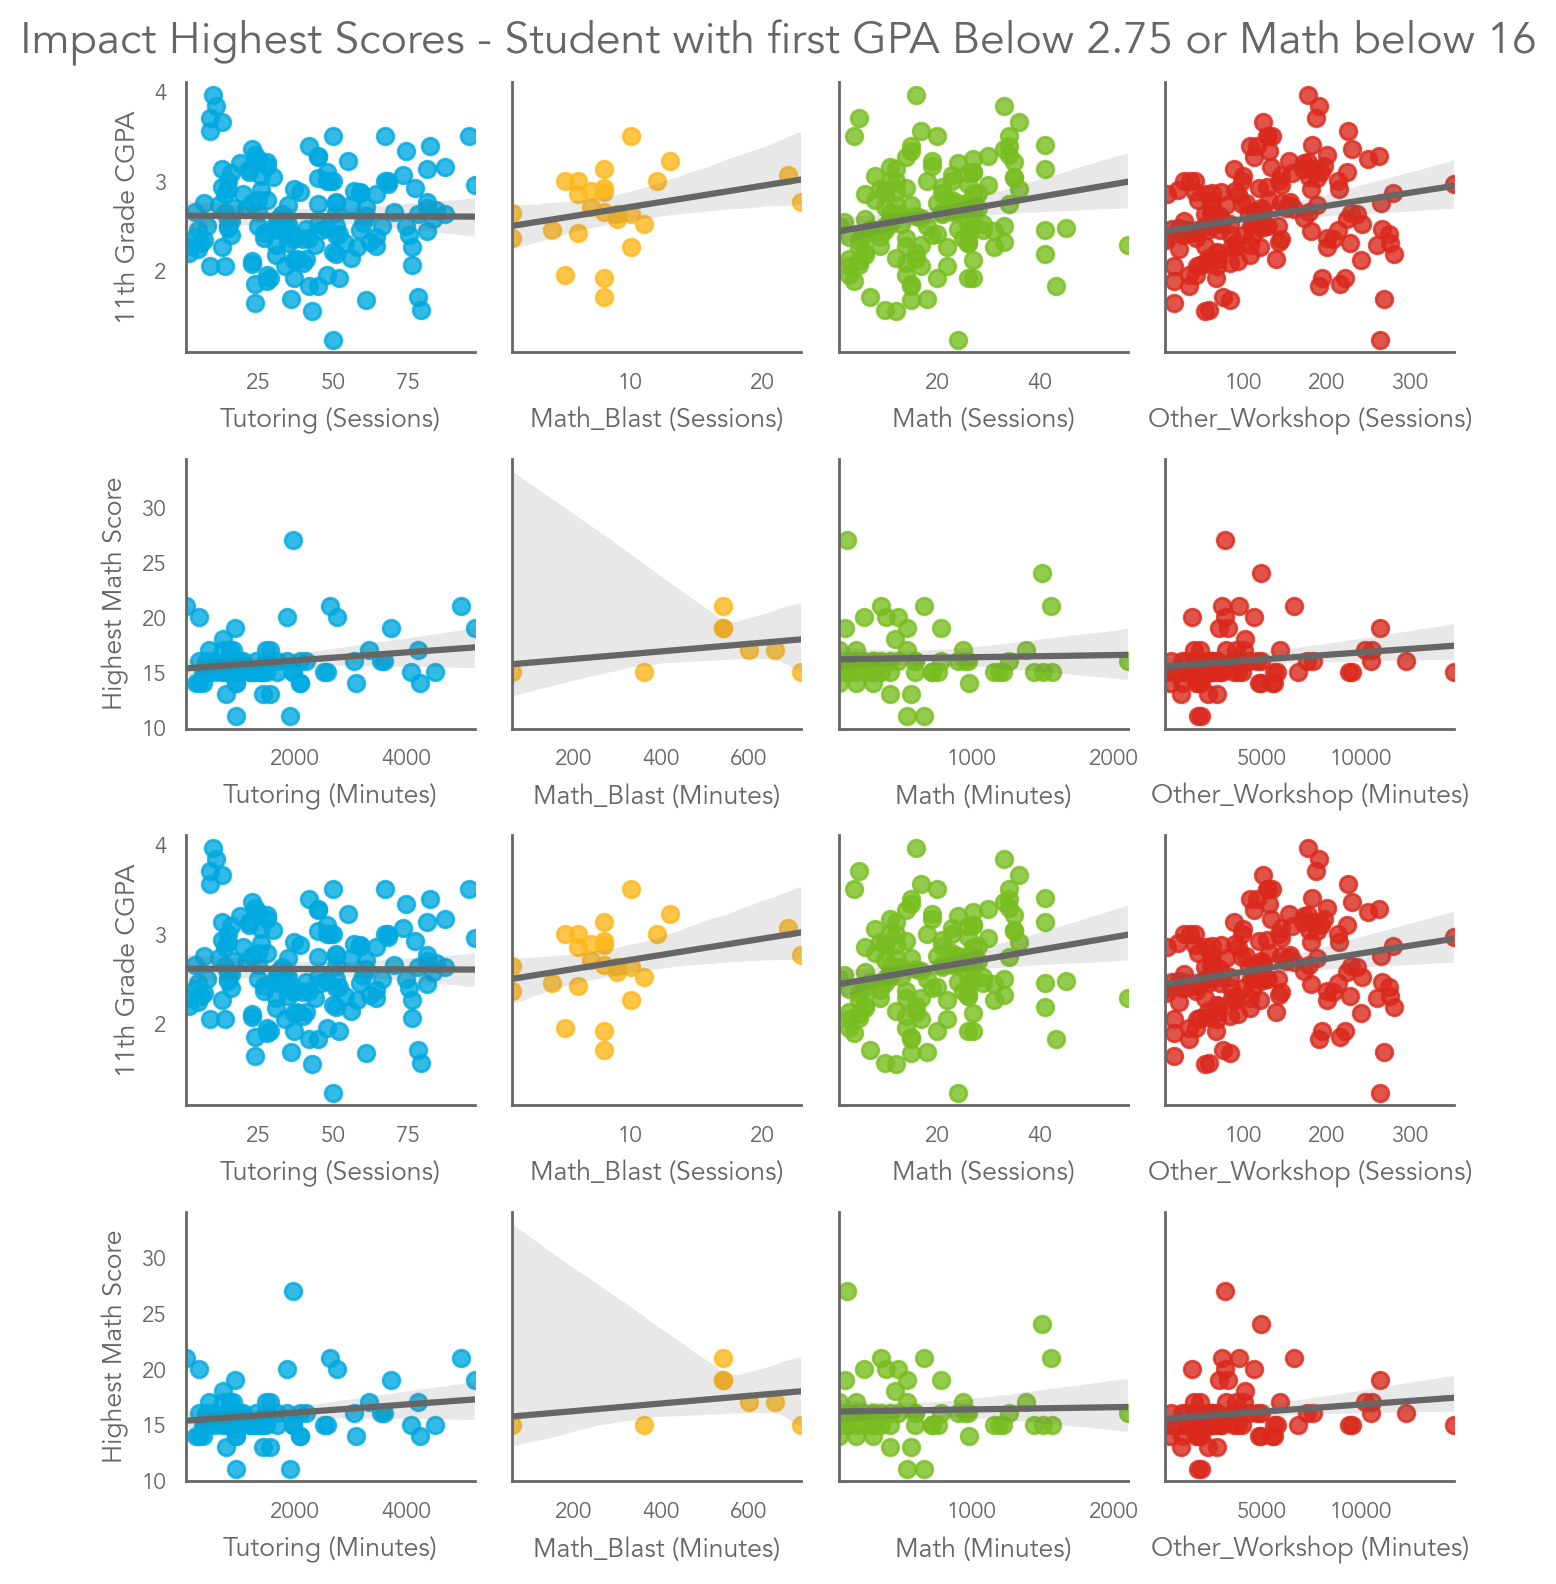

In [19]:
create_overall_chart(
    overall_df_first_gpa_low,
    overall_df_first_math_low,
    x_1="Attendance_Numerator",
    x_2='mod_duration_filled',
    y_1="HS_11th_Cum_GPA",
    y_2='highest_math_score',
    x_1_label="(Sessions)",
    x_2_label="(Minutes)",
    y_1_label="11th Grade CGPA", 
    y_2_label='Highest Math Score', 
    title="Impact Highest Scores - Student with first GPA Below 2.75 or Math below 16", colors=colors
)

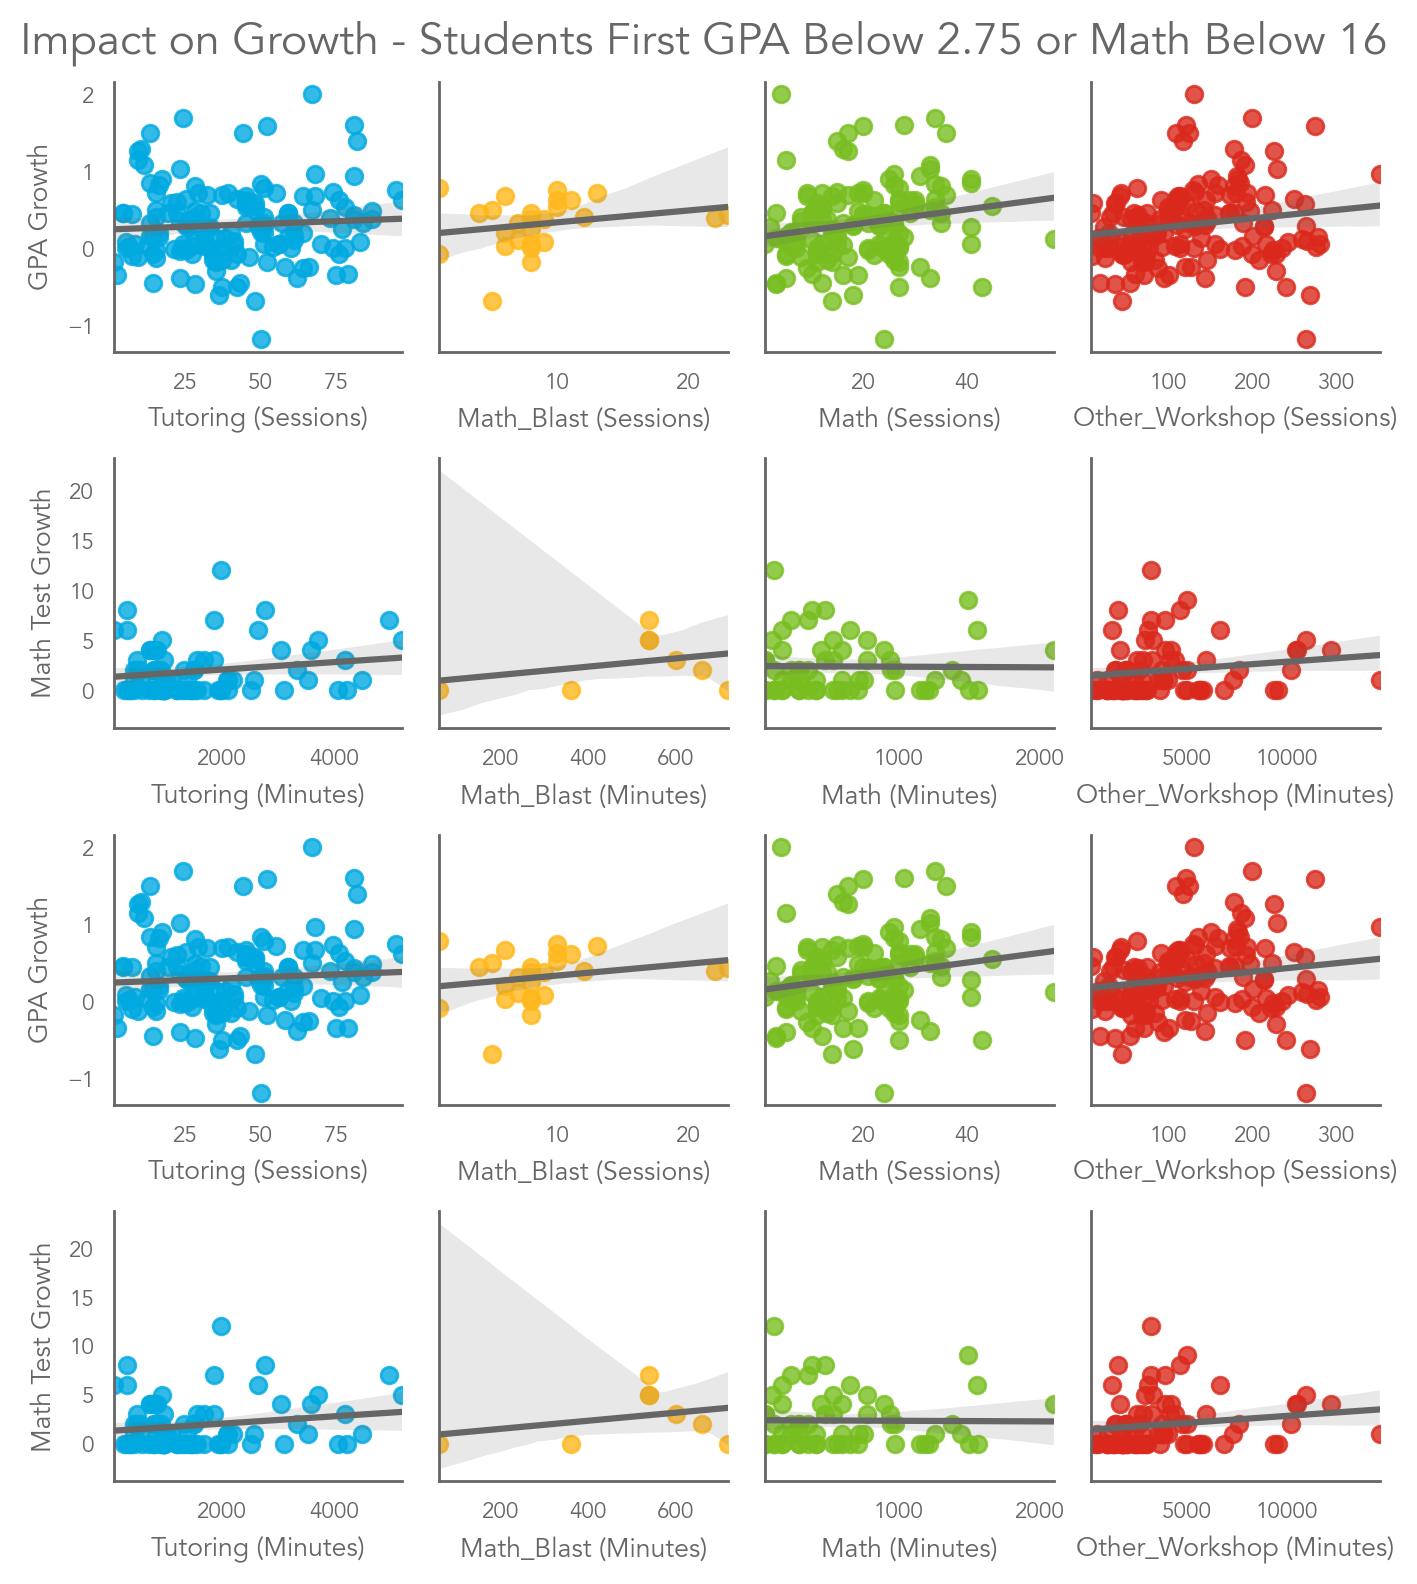

In [20]:
create_overall_chart(
    overall_df_first_gpa_low,
    overall_df_first_math_low,
    x_1="Attendance_Numerator",
    x_2='mod_duration_filled',
    y_1="gpa_growth",
    y_2='math_test_growth',
    x_1_label="(Sessions)",
    x_2_label="(Minutes)",
    y_1_label="GPA Growth", 
    y_2_label='Math Test Growth', 
    title="Impact on Growth - Students First GPA Below 2.75 or Math Below 16", colors=colors
)

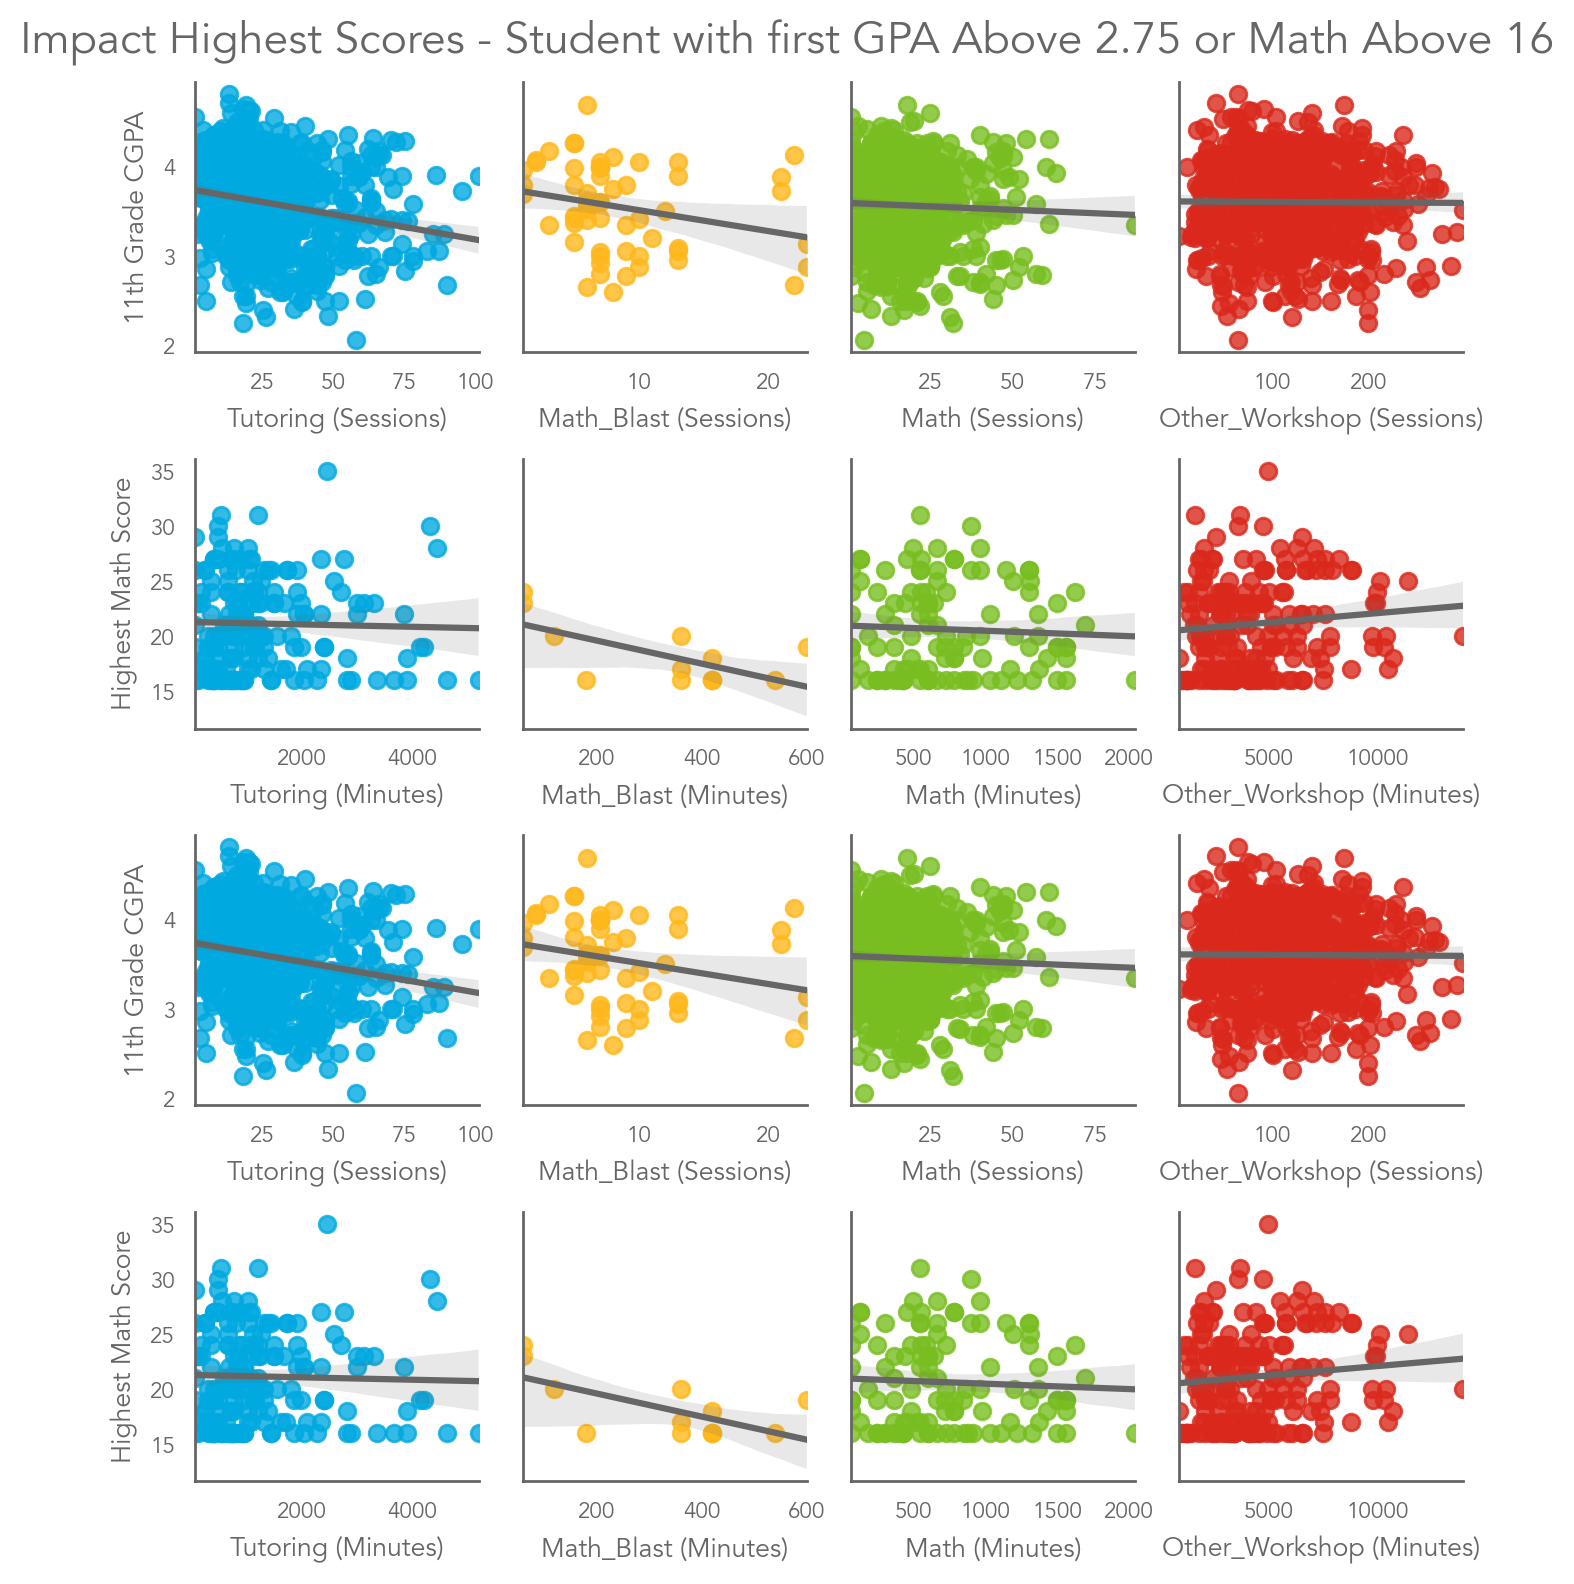

In [21]:
create_overall_chart(
    overall_df_first_gpa_high,
    overall_df_first_math_high,
    x_1="Attendance_Numerator",
    x_2='mod_duration_filled',
    y_1="HS_11th_Cum_GPA",
    y_2='highest_math_score',
    x_1_label="(Sessions)",
    x_2_label="(Minutes)",
    y_1_label="11th Grade CGPA", 
    y_2_label='Highest Math Score', 
    title="Impact Highest Scores - Student with first GPA Above 2.75 or Math Above 16", colors=colors
)

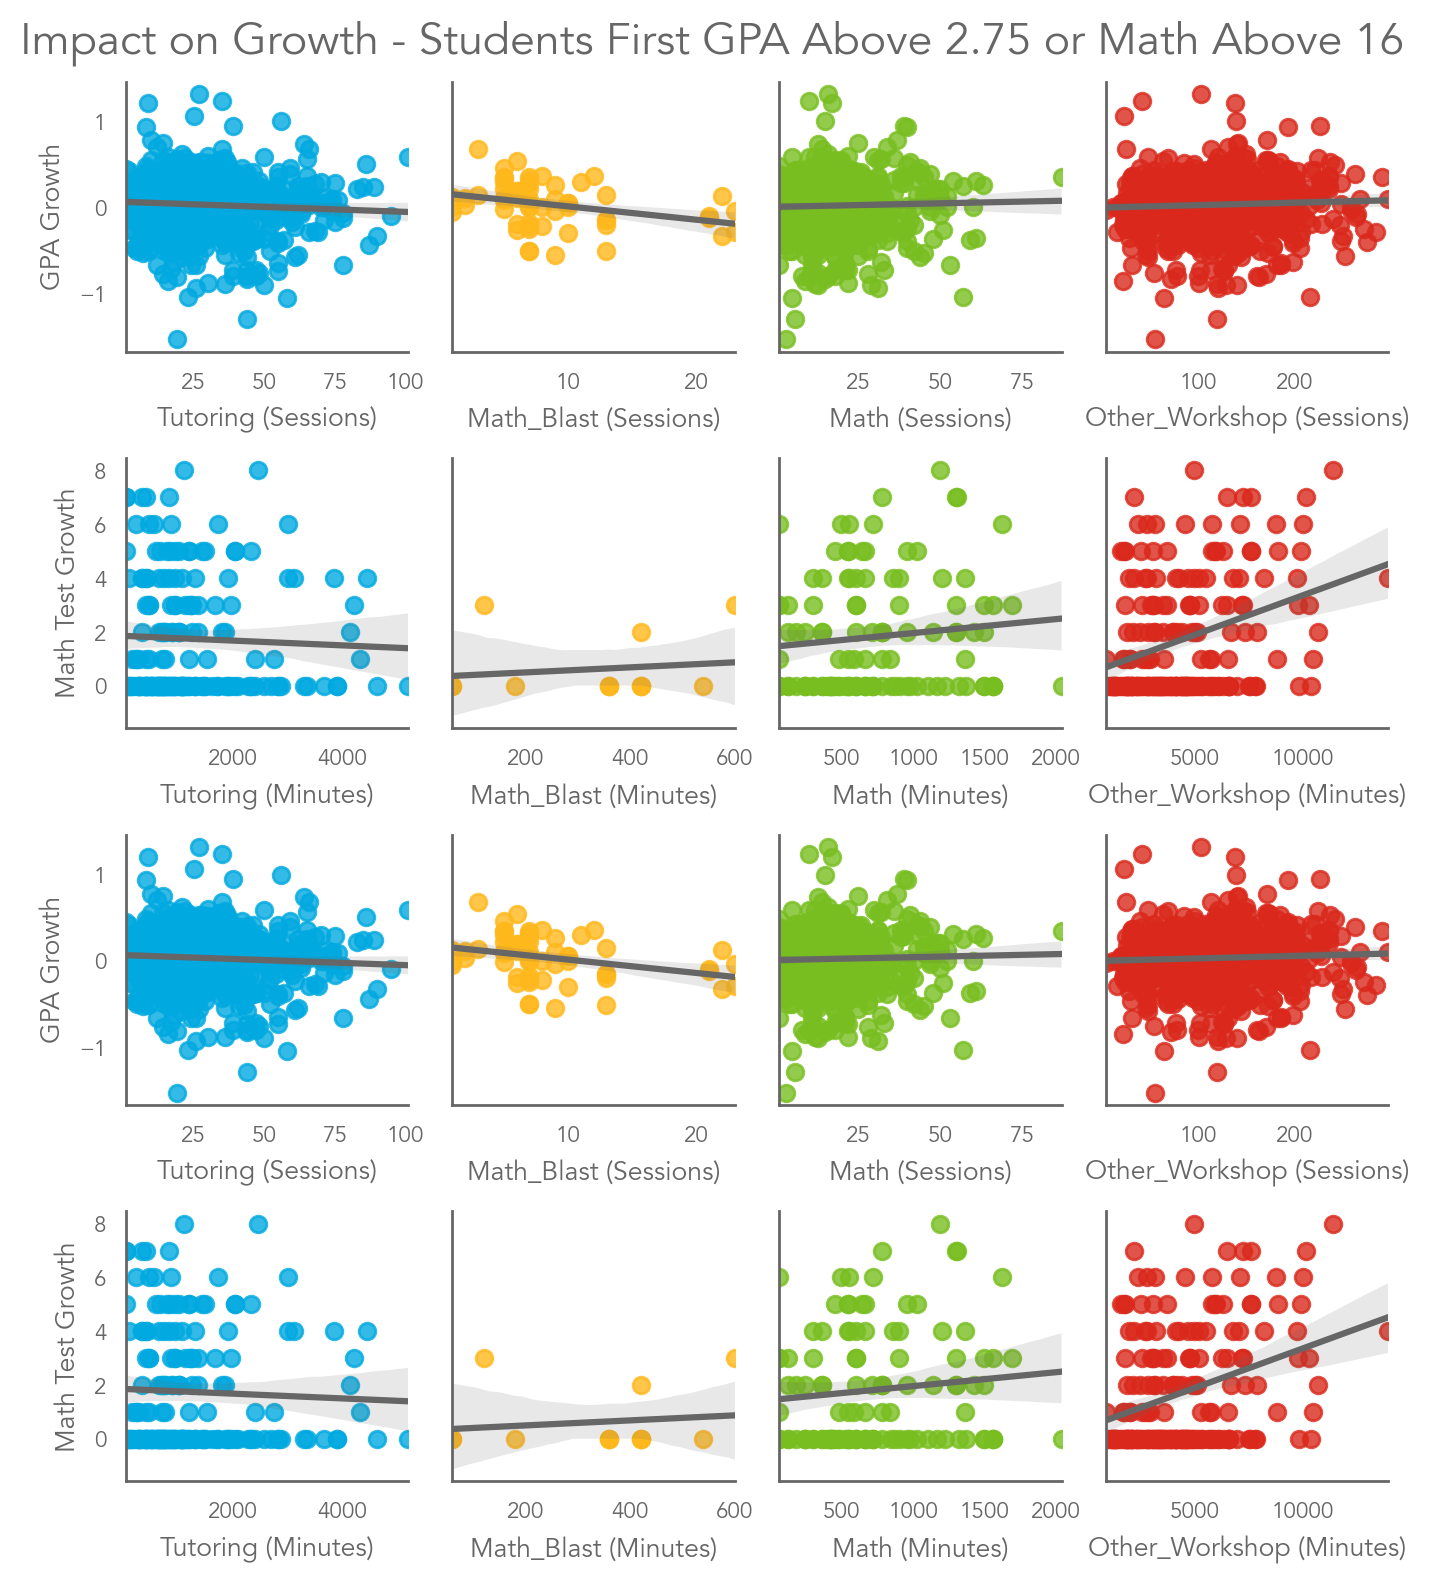

In [22]:
create_overall_chart(
    overall_df_first_gpa_high,
    overall_df_first_math_high,
    x_1="Attendance_Numerator",
    x_2='mod_duration_filled',
    y_1="gpa_growth",
    y_2='math_test_growth',
    x_1_label="(Sessions)",
    x_2_label="(Minutes)",
    y_1_label="GPA Growth", 
    y_2_label='Math Test Growth', 
    title="Impact on Growth - Students First GPA Above 2.75 or Math Above 16", colors=colors
)

## Selected Regressions

The following OLS regression results were selected based on relevant statistically significant results. 

Note, Math Blast was excluded from the regressions for two reasons. First, it isn't required for all students, and is only required for students doing poor in math - thus inherently biasing the model. Second, because it isn't required for all students, many students do not have relevant data. Generally, if a student is missing a variable in a regression model that student is removed from the model. By keeping Math Blast in the model it dramatically limited the number of valid observations. 

### Evaluating Impact on Highest GPA - Workshop Sessions

In [23]:
mod = smf.ols(formula='HS_11th_Cum_GPA ~  Attendance_Numerator_Math + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_final, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        HS_11th_Cum_GPA   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     21.63
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           1.97e-13
Time:                        16:23:01   Log-Likelihood:                -659.01
No. Observations:                 738   AIC:                             1326.
Df Residuals:                     734   BIC:                             1344.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Evaluating Impact on Highest Math Test Score - Workshop Sessions

In [24]:
mod = smf.ols(formula='highest_math_score ~  Attendance_Numerator_Math + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_final, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     highest_math_score   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     20.57
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           8.38e-13
Time:                        16:23:01   Log-Likelihood:                -2058.9
No. Observations:                 733   AIC:                             4126.
Df Residuals:                     729   BIC:                             4144.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Evaluating Impact on GPA Growth - Workshop Sessions

In [25]:
mod = smf.ols(formula='gpa_growth ~ Attendance_Numerator_Math + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_valid_first_gpa, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             gpa_growth   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.536
Date:                Mon, 02 Nov 2020   Prob (F-statistic):             0.0145
Time:                        16:23:02   Log-Likelihood:                -358.37
No. Observations:                 723   AIC:                             724.7
Df Residuals:                     719   BIC:                             743.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Evaluating Impact on Math Growth - Workshop Sessions

In [26]:
mod = smf.ols(formula='math_test_growth ~ Attendance_Numerator_Math  + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_valid_first_math, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       math_test_growth   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     8.022
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           4.81e-05
Time:                        16:23:02   Log-Likelihood:                -402.45
No. Observations:                 182   AIC:                             812.9
Df Residuals:                     178   BIC:                             825.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Evaluating Impact on GPA Growth For Students Below 2.75 GPA - Workshop Sessions

In [33]:
mod = smf.ols(formula='gpa_growth ~ Attendance_Numerator_Math  + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_first_gpa_low, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             gpa_growth   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.042
Date:                Mon, 02 Nov 2020   Prob (F-statistic):              0.111
Time:                        16:24:59   Log-Likelihood:                -103.10
No. Observations:                 147   AIC:                             214.2
Df Residuals:                     143   BIC:                             226.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Evaluating Impact on Math Growth For Students Below 16 Math Score - Workshop Sessions

In [28]:


mod = smf.ols(formula='math_test_growth ~  Attendance_Numerator_Math + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_first_math_low, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       math_test_growth   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.880
Date:                Mon, 02 Nov 2020   Prob (F-statistic):              0.142
Time:                        16:23:02   Log-Likelihood:                -162.04
No. Observations:                  69   AIC:                             332.1
Df Residuals:                      65   BIC:                             341.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Evaluating Impact on GPA Growth For Students Above 2.75 GPA - Workshop Sessions

In [29]:
mod = smf.ols(formula='gpa_growth ~ Attendance_Numerator_Math  + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_first_gpa_high, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             gpa_growth   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.013
Date:                Mon, 02 Nov 2020   Prob (F-statistic):              0.111
Time:                        16:23:02   Log-Likelihood:                -203.15
No. Observations:                 576   AIC:                             414.3
Df Residuals:                     572   BIC:                             431.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Evaluating Impact on Math Growth For Students Above 16 Math Score - Workshop Sessions

In [30]:


mod = smf.ols(formula='math_test_growth ~  Attendance_Numerator_Math + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_first_math_high, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       math_test_growth   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     10.59
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           3.62e-06
Time:                        16:23:02   Log-Likelihood:                -232.18
No. Observations:                 113   AIC:                             472.4
Df Residuals:                     109   BIC:                             483.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [31]:
%%html

<script>
$(document).ready(function(){
    window.code_toggle = function() {
        (window.code_shown) ? $('div.input').hide(250) : $('div.input').show(250);
        window.code_shown = !window.code_shown
    }
    if($('body.nbviewer').length) {
        $('<li><a href="javascript:window.code_toggle()" title="Show/Hide Code"><span class="fa fa-code fa-2x menu-icon"></span><span class="menu-text">Show/Hide Code</span></a></li>').appendTo('.navbar-right');
        window.code_shown=false;
        $('div.input').hide();
    }
});
</script>


<style>

div.prompt {display:none}


h1, .h1 {
    font-size: 33px;
    font-family: "Trebuchet MS";
    font-size: 2.5em !important;
    color: #2a7bbd;
}

h2, .h2 {
    font-size: 10px;
    font-family: "Trebuchet MS";
    color: #2a7bbd; 
    
}


h3, .h3 {
    font-size: 10px;
    font-family: "Trebuchet MS";
    color: #5d6063; 
    
}

.rendered_html table {

    font-size: 14px;
}

.output_png {
  display: flex;
  justify-content: center;
}

.cell {
    padding: 0px;
}


</style>